# Notebook 1: Data Cleaning / EDA / Machine Learning Models

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Data sources

|File Name|Organization|Dataset Location|Description|
|---|---|---|---|
|**2682403.csv**|[National Centers for Environmental Information (National Oceanic and Atmospheric Administration)](https://www.ncdc.noaa.gov/cdo-web/)|[Information Request](https://www.ncdc.noaa.gov/cdo-web/orders?email=akira.j.takahashi@gmail.com&id=2682403)|Daily Summaries for various weather stations in Alaska|
|**co2_brw_surface-insitu_1_ccgg_DailyData.txt** </br> (Excess comments in txt file removed and saved as **co2_data.csv**)|[National Centers for Environmental Information (National Oceanic and Atmospheric Administration)](https://www.ncdc.noaa.gov/cdo-web/)|[Data source](https://gml.noaa.gov/aftp/data/trace_gases/co2/in-situ/surface/brw/co2_brw_surface-insitu_1_ccgg_DailyData.txt)|Atmospheric Carbon Dioxide Dry Air Mole Fractions from quasi-continuous measurements at Barrow, Alaska|
|**Dutch.csv** </br> **Ketchikan.csv** </br> **Kodiak.csv** </br> **Nome.csv** </br> **Seward.csv** </br> **Sitka.csv** </br> **Yakutat.csv**|[University of Hawaii Sea Level Center](https://uhslc.soest.hawaii.edu)|[Link to Dataset](http://uhslc.soest.hawaii.edu/data/)|Sealevels for various weather stations in Alaska|

In [2]:
# Reading in daily summaries data for each weather station collected from the NCEA (NOAA)
dailysumm = pd.read_csv('./data/2682403.csv')

/Users/akiratakahashi/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,9,11,13,15,17,19,21,23,27,33,39,41,43,45,47,49,51,53,55,57,59,63,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Checking for null values - quick visualization. Not intended to be comprehensive at this point
dailysumm.isnull().sum()

STATION                 0
NAME                    0
LATITUDE                0
LONGITUDE               0
ELEVATION               0
                    ...  
WV07_ATTRIBUTES    103922
WV18               103921
WV18_ATTRIBUTES    103921
WV20               103747
WV20_ATTRIBUTES    103747
Length: 110, dtype: int64

In [4]:
# Grouping by NAME to ensure that we're looking at the weather stations we want to see
dailysumm.groupby('NAME').describe()

LATITUDE                                              \
                            count      mean           std       min       25%   
NAME                                                                            
DUTCH HARBOR, AK US       13973.0  53.89500  1.055194e-11  53.89500  53.89500   
KETCHIKAN AIRPORT, AK US  14100.0  55.35956  9.400814e-12  55.35956  55.35956   
KODIAK AIRPORT, AK US     15197.0  57.75110  5.442936e-12  57.75110  57.75110   
NOME AIRPORT, AK US       15197.0  64.51110  3.225970e-12  64.51110  64.51110   
SEWARD AIRPORT, AK US     15109.0  60.12833  1.441028e-11  60.12833  60.12833   
SITKA AIRPORT, AK US      15153.0  57.04810  1.232832e-11  57.04810  57.04810   
YAKUTAT AIRPORT, AK US    15194.0  59.51200  1.009714e-11  59.51200  59.51200   

                                                       LONGITUDE             \
                               50%       75%       max     count       mean   
NAME                                                                          
DUTCH HARBOR, AK US       53.89500  53.89500  53.89500   13973.0 -166.54330   
KETCHIKAN AIRPORT, AK US  55.35956  55.35956  55.35956   14100.0 -131.72074   
KODIAK AIRPORT, AK US     57.75110  57.75110  57.75110   15197.0 -152.48550   
NOME AIRPORT, AK US       64.51110  64.51110  64.51110   15197.0 -165.44000   
SEWARD AIRPORT, AK US     60.12833  60.12833  60.12833   15109.0 -149.41667   
SITKA AIRPORT, AK US      57.04810  57.04810  57.04810   15153.0 -135.36470   
YAKUTAT AIRPORT, AK US    59.51200  59.51200  59.51200   15194.0 -139.67120   

                          ... WV18       WV20                                \
                          ...  75%  max count mean  std  min  25%  50%  75%   
NAME                      ...                                                 
DUTCH HARBOR, AK US       ...  NaN  NaN   0.0  NaN  NaN  NaN  NaN  NaN  NaN   
KETCHIKAN AIRPORT, AK US  ...  NaN  NaN   0.0  NaN  NaN  NaN  NaN  NaN  NaN   
KODIAK AIRPORT, AK US     ...  NaN  NaN  30.0  1.0  0.0  1.0  1.0  1.0  1.0   
NOME AIRPORT, AK US       ...  1.0  1.0  59.0  1.0  0.0  1.0  1.0  1.0  1.0   
SEWARD AIRPORT, AK US     ...  NaN  NaN   0.0  NaN  NaN  NaN  NaN  NaN  NaN   
SITKA AIRPORT, AK US      ...  NaN  NaN  66.0  1.0  0.0  1.0  1.0  1.0  1.0   
YAKUTAT AIRPORT, AK US    ...  1.0  1.0  21.0  1.0  0.0  1.0  1.0  1.0  1.0   

                               
                          max  
NAME                           
DUTCH HARBOR, AK US       NaN  
KETCHIKAN AIRPORT, AK US  NaN  
KODIAK AIRPORT, AK US     1.0  
NOME AIRPORT, AK US       1.0  
SEWARD AIRPORT, AK US     NaN  
SITKA AIRPORT, AK US      1.0  
YAKUTAT AIRPORT, AK US    1.0  

[7 rows x 440 columns]

In [5]:
# Our data collection ranged from 1980-01-01 to 2021-08-10.
# This cell does a quick approximation of 40 years worth of data points (40 years * 365 days / year)
365*40

14600

In [6]:
# A more accurate calculation of the days between 1980-01-01 to 2021-08-10
# We determine this to be 15,197 days.

# This means that in the above describe() function, we should ideally see 15,197 data points per 
# weather station because we are collecting daily summaries.

# From this, we can see Dutch Harbor and Ketchikan Airport weather stations are missing a significant amount
# of data

from datetime import date

first_date = date(1980, 1, 1)
last_date = date(2021, 8, 10)
delta = last_date - first_date
print(delta)

15197 days, 0:00:00


In [7]:
# Reading in CO2 data collected from the NCEA (NOAA).
# Original txt file contained data dictionary within file.
# Therefore, unnecessary rows were removed in separate Jupyter lab tab,
# and file was renamed cleaned_co2_data.txt

co2_data = pd.read_csv('./data/cleaned_co2_data.txt')

In [8]:
# Displaying first 5 rows of dataframe
co2_data.head()

,site_code year month day hour minute second time_decimal value value_std_dev nvalue latitude longitude altitude elevation intake_height qcflag
0,BRW 1973 1 1 0 0 0 1973.0 -999.99 -99.99 0 71....
1,BRW 1973 1 2 0 0 0 1973.0027397260274 -999.99 ...
2,BRW 1973 1 3 0 0 0 1973.0054794520547 -999.99 ...
3,BRW 1973 1 4 0 0 0 1973.0082191780823 -999.99 ...
4,BRW 1973 1 5 0 0 0 1973.0109589041097 -999.99 ...


In [9]:
# Displaying shape of data set. We see that all data is grouped into 1 column.
co2_data.shape

(17532, 1)

In [10]:
# Displaying datatype of the 1 column of data
co2_data.dtypes

site_code year month day hour minute second time_decimal value value_std_dev nvalue latitude longitude altitude elevation intake_height qcflag    object
dtype: object

In [11]:
# Because each row is of datatype = object, splitting by ' ' (space) and expanding dataset columns
# to put separated objects into a unique column
co2_data = co2_data['site_code year month day hour minute second time_decimal value value_std_dev nvalue latitude longitude altitude elevation intake_height qcflag'].str.split(' ', expand=True)

In [12]:
# Creating column names for the newly created columns
column_names = ['site_code', 'year', 'month', 'day', 'hour', 'minute', 'second', 'time_decimal', 'value', 'value_std_dev', 'nvalue', 'latitude', 'longitude', 'altitude', 'elevation', 'intake_height', 'qcflag']

In [13]:
# Updating dataframe column names
co2_data.columns = column_names

In [14]:
# Displaying dataframe
co2_data

,site_code,year,month,day,hour,minute,second,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag
0,BRW,1973,1,1,0,0,0,1973.0,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
1,BRW,1973,1,2,0,0,0,1973.0027397260274,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
2,BRW,1973,1,3,0,0,0,1973.0054794520547,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
3,BRW,1973,1,4,0,0,0,1973.0082191780823,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
4,BRW,1973,1,5,0,0,0,1973.0109589041097,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,BRW,2020,12,27,0,0,0,2020.9863387978141,419.22,0.1,17,71.323,-156.611,27.46,11.0,16.46,...
17528,BRW,2020,12,28,0,0,0,2020.9890710382513,418.67,0.21,24,71.323,-156.611,27.46,11.0,16.46,...
17529,BRW,2020,12,29,0,0,0,2020.9918032786886,418.88,0.07,24,71.323,-156.611,27.46,11.0,16.46,...
17530,BRW,2020,12,30,0,0,0,2020.9945355191257,418.92,0.06,24,71.323,-156.611,27.46,11.0,16.46,...


In [15]:
# We intend to merge the two datasets created thus far. (daily summaries and co2)

# To do this, we will merge via the dates

# We compare the way the initial daily summaries dataframe's date columns are structured
# to the co2 dataframe's equivalent.

# We see that the daily summaries dataframe shows the 10s digit for Jan - Sept.
# Therefore, I'll add this to the co2 data.

# Likewise, for the first 9 days of the month, we reformat the date to be of form 0X instead of X.

co2_data['day'].replace('1', '01', inplace=True)
co2_data['day'].replace('2', '02', inplace=True)
co2_data['day'].replace('3', '03', inplace=True)
co2_data['day'].replace('4', '04', inplace=True)
co2_data['day'].replace('5', '05', inplace=True)
co2_data['day'].replace('6', '06', inplace=True)
co2_data['day'].replace('7', '07', inplace=True)
co2_data['day'].replace('8', '08', inplace=True)
co2_data['day'].replace('9', '09', inplace=True)

co2_data['month'].replace('1', '01', inplace=True)
co2_data['month'].replace('2', '02', inplace=True)
co2_data['month'].replace('3', '03', inplace=True)
co2_data['month'].replace('4', '04', inplace=True)
co2_data['month'].replace('5', '05', inplace=True)
co2_data['month'].replace('6', '06', inplace=True)
co2_data['month'].replace('7', '07', inplace=True)
co2_data['month'].replace('8', '08', inplace=True)
co2_data['month'].replace('9', '09', inplace=True)

In [16]:
# Because the year/month/day information is separated into separate columns in the co2 dataframe,
# we create a new column combining this information

# The newly created year-month-day column's dates are equivalent in formatting structure to that of
# the DATE column in the daily summaries dataframe.
co2_data['year-month-day'] = co2_data['year'] + '-' + co2_data['month'] + '-' + co2_data['day']

In [17]:
# Confirming creation of new column
co2_data.head()

,site_code,year,month,day,hour,minute,second,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag,year-month-day
0,BRW,1973,01,01,0,0,0,1973.0,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-01
1,BRW,1973,01,02,0,0,0,1973.0027397260274,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-02
2,BRW,1973,01,03,0,0,0,1973.0054794520547,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-03
3,BRW,1973,01,04,0,0,0,1973.0082191780823,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-04
4,BRW,1973,01,05,0,0,0,1973.0109589041097,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-05


In [18]:
# Dropping unnecessary columns from co2 dataframe (individual time columns)
co2_data.drop(columns=['year', 'month', 'day', 'hour', 'minute', 'second'], inplace=True)

In [19]:
# Making sure the dropped columns are reflected
co2_data.head()

,site_code,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,qcflag,year-month-day
0,BRW,1973.0,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-01
1,BRW,1973.0027397260274,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-02
2,BRW,1973.0054794520547,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-03
3,BRW,1973.0082191780823,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-04
4,BRW,1973.0109589041097,-999.99,-99.99,0,71.323,-156.611,27.0,11.0,16.0,*..,1973-01-05


In [20]:
# Reading in daily summaries dataframe information just to confirm DATE column content is equivalent
# in format structure.
dailysumm.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES,WV07,WV07_ATTRIBUTES,WV18,WV18_ATTRIBUTES,WV20,WV20_ATTRIBUTES
0,USW00025333,"SITKA AIRPORT, AK US",57.0481,-135.3647,4.3,1980-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00025333,"SITKA AIRPORT, AK US",57.0481,-135.3647,4.3,1980-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00025333,"SITKA AIRPORT, AK US",57.0481,-135.3647,4.3,1980-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00025333,"SITKA AIRPORT, AK US",57.0481,-135.3647,4.3,1980-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00025333,"SITKA AIRPORT, AK US",57.0481,-135.3647,4.3,1980-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Merging dataframes 
merged_df = co2_data.merge(dailysumm, left_on = co2_data['year-month-day'], right_on = dailysumm['DATE'], how='inner')

In [22]:
# Looking at newly merged dataframe's structure
merged_df.shape

(102387, 123)

In [23]:
# Because we are dealing with a lot of columns, a simple .isnull().sum() will not show all column content.
# Therefore, we are writing out code to show the columns with null values, the number of null values, and their unique values
# using print statements

columns_with_null = 0
for column in merged_df.columns:
    if merged_df[column].isnull().sum() != 0:
        if 'ATTRIBUTE' not in column:
            print(f'{column}: null values #{merged_df[column].isnull().sum()}')
            print(f'{column}: unique values #{merged_df[column].unique()}\n')
            columns_with_null += 1

columns_with_null

ACMH: null values #82957
ACMH: unique values #[ nan  20.  90.   0.  50. 100.  40.  30.  70.  80.  10.  60.  25.  88.
  13.  75.  38.  63.]

ACSH: null values #82934
ACSH: unique values #[ nan  50. 100.  10.  90.   0.  60.  30.  70.  80.  40.  20.  25.  88.
  13.  63.  75.  38.]

AWND: null values #37122
AWND: unique values #[ nan  4.8  4.5 10.1  1.4  3.3  3.   2.2  3.2 11.   2.4  3.7  9.7  3.4
  3.9  6.2  4.   2.   3.8 10.7  0.   5.   8.6  9.2  7.8  5.3  2.6  7.7
  5.8  5.5  1.2  9.1  1.   4.6  1.6  2.5  0.9  3.5  5.9  0.6  2.9  1.5
  4.3  0.4  4.9  2.7  7.4  9.8  6.1  6.   1.1  5.7  4.2  8.5  6.7  1.8
  3.6  9.5  6.3  6.8  5.2  2.1  2.3  4.4  8.9  5.1 11.1  1.3  8.8  7.
  4.1 16.6  7.2  4.7 12.2 10.3 12.7  8.2  8.7  2.8  5.6  8.   6.4  1.7
  7.3 10.5  6.6 10.   0.5  1.9  6.5  7.5  3.1  8.3  6.9  8.4  9.6  7.9
  9.9 11.3  7.6 11.8  9.   5.4  9.4 11.4  9.3  7.1  8.1 12.4 11.6 10.8
  0.8 16.8  0.2 12.  12.3 10.6 13.6 13.1 10.9 13.  11.5 11.7 10.2 15.2
 13.2  0.7 10.4 12.1  0.3 13.3 11.2 

52

In [24]:
# Taking a look at the first 25 columns of data
merged_df.iloc[:, : 25].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   key_0            102387 non-null  object 
 1   site_code        102387 non-null  object 
 2   time_decimal     102387 non-null  object 
 3   value            102387 non-null  object 
 4   value_std_dev    102387 non-null  object 
 5   nvalue           102387 non-null  object 
 6   latitude         102387 non-null  object 
 7   longitude        102387 non-null  object 
 8   altitude         102387 non-null  object 
 9   elevation        102387 non-null  object 
 10  intake_height    102387 non-null  object 
 11  qcflag           102387 non-null  object 
 12  year-month-day   102387 non-null  object 
 13  STATION          102387 non-null  object 
 14  NAME             102387 non-null  object 
 15  LATITUDE         102387 non-null  float64
 16  LONGITUDE        102387 non-null  floa

In [25]:
# Creating a copy of the merged dataframe just so we can refer back to the original merged copy if necessary
cleaned_df=merged_df.copy();

In [26]:
# We opted to fill in the Average Cloudiness Midnight to Midnight from manual observations (percent) null values with Median
cleaned_df['ACMH'] = cleaned_df['ACMH'].fillna(cleaned_df['ACMH'].median())
cleaned_df['ACMH_ATTRIBUTES'] = cleaned_df['ACMH_ATTRIBUTES'].fillna('NULL')

In [27]:
# Likewise for Average cloudiness sunrise to sunset from manual observations (percent)
cleaned_df['ACSH'] = cleaned_df['ACSH'].fillna(cleaned_df['ACSH'].median())
cleaned_df['ACSH_ATTRIBUTES'] = cleaned_df['ACSH_ATTRIBUTES'].fillna('NULL')

In [28]:
# Likewise for Average daily wind speed (meters per second or miles per hour as per user preference)
cleaned_df['AWND'] = cleaned_df['AWND'].fillna(cleaned_df['AWND'].median())
cleaned_df['AWND_ATTRIBUTES'] = cleaned_df['AWND_ATTRIBUTES'].fillna('NULL')

In [29]:
# First 25 columns have no null values now
cleaned_df.iloc[:, : 25].isnull().sum()

key_0              0
site_code          0
time_decimal       0
value              0
value_std_dev      0
nvalue             0
latitude           0
longitude          0
altitude           0
elevation          0
intake_height      0
qcflag             0
year-month-day     0
STATION            0
NAME               0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
DATE               0
ACMH               0
ACMH_ATTRIBUTES    0
ACSH               0
ACSH_ATTRIBUTES    0
AWND               0
AWND_ATTRIBUTES    0
dtype: int64

In [30]:
# Checking next 25 columns of data
cleaned_df.iloc[:, 25:51].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DAPR             73 non-null      float64
 1   DAPR_ATTRIBUTES  73 non-null      object 
 2   DASF             4 non-null       float64
 3   DASF_ATTRIBUTES  4 non-null       object 
 4   FMTM             44355 non-null   float64
 5   FMTM_ATTRIBUTES  44355 non-null   object 
 6   MDPR             89 non-null      float64
 7   MDPR_ATTRIBUTES  89 non-null      object 
 8   MDSF             7 non-null       float64
 9   MDSF_ATTRIBUTES  7 non-null       object 
 10  PGTM             60355 non-null   float64
 11  PGTM_ATTRIBUTES  60355 non-null   object 
 12  PRCP             100906 non-null  float64
 13  PRCP_ATTRIBUTES  100906 non-null  object 
 14  PSUN             1511 non-null    float64
 15  PSUN_ATTRIBUTES  1511 non-null    object 
 16  SNOW             76602 non-null   floa

In [31]:
# DAPR - Number of days included in the multiday precipitation total (MDPR) - filling in with 0 / Null string
cleaned_df['DAPR'] = cleaned_df['DAPR'].fillna(0)
cleaned_df['DAPR_ATTRIBUTES'] = cleaned_df['DAPR_ATTRIBUTES'].fillna('NULL')

# DASF = Number of days included in the multiday snowfall total (MDSF) - filled in with 0 or Null string
cleaned_df['DASF'] = cleaned_df['DASF'].fillna(0)
cleaned_df['DASF_ATTRIBUTES'] = cleaned_df['DASF_ATTRIBUTES'].fillna('NULL')

# FMTM - Time of fastest mile or fastest 1-minute wind - Filled in with median
cleaned_df['FMTM'] = cleaned_df['FMTM'].fillna(cleaned_df['FMTM'].median())
cleaned_df['FMTM_ATTRIBUTES'] = cleaned_df['FMTM_ATTRIBUTES'].fillna('NULL')

# multiday precipitation total - filled in with median
cleaned_df['MDPR'] = cleaned_df['MDPR'].fillna(cleaned_df['MDPR'].median())
cleaned_df['MDPR_ATTRIBUTES'] = cleaned_df['MDPR_ATTRIBUTES'].fillna('NULL')

# MDSF = Multiday snowfall total (mm or inches as per user preference) - filled in with zero
cleaned_df['MDSF'] = cleaned_df['MDSF'].fillna(0)
cleaned_df['MDSF_ATTRIBUTES'] = cleaned_df['MDSF_ATTRIBUTES'].fillna('NULL')

# PGTM = Peak gust time (hours and minutes, i.e., HHMM) filled in with median
cleaned_df['PGTM'] = cleaned_df['PGTM'].fillna(cleaned_df['PGTM'].median())
cleaned_df['PGTM_ATTRIBUTES'] = cleaned_df['PGTM_ATTRIBUTES'].fillna('NULL')

# PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
# Filled in with median
cleaned_df['PRCP'] = cleaned_df['PRCP'].fillna(cleaned_df['PRCP'].median())
cleaned_df['PRCP_ATTRIBUTES'] = cleaned_df['PRCP_ATTRIBUTES'].fillna('NULL')

# PSUN = Daily percent of possible sunshine (percent) filled in with median
cleaned_df['PSUN'] = cleaned_df['PSUN'].fillna(cleaned_df['PSUN'].median())
cleaned_df['PSUN_ATTRIBUTES'] = cleaned_df['PSUN_ATTRIBUTES'].fillna('NULL')

# SNOW - snowfall - filled in with median
cleaned_df['SNOW'] = cleaned_df['SNOW'].fillna(cleaned_df['SNOW'].median())
cleaned_df['SNOW_ATTRIBUTES'] = cleaned_df['SNOW_ATTRIBUTES'].fillna('NULL')

# SNWD - snow depth - filled in with median
cleaned_df['SNWD'] = cleaned_df['SNWD'].fillna(cleaned_df['SNWD'].median())
cleaned_df['SNWD_ATTRIBUTES'] = cleaned_df['SNWD_ATTRIBUTES'].fillna('NULL')

# Average temperature - filled in with median
cleaned_df['TAVG'] = cleaned_df['TAVG'].fillna(cleaned_df['TAVG'].median())
cleaned_df['TAVG_ATTRIBUTES'] = cleaned_df['TAVG_ATTRIBUTES'].fillna('NULL')

# Maximum temperature - filled in with median
cleaned_df['TMAX'] = cleaned_df['TMAX'].fillna(cleaned_df['TMAX'].median())
cleaned_df['TMAX_ATTRIBUTES'] = cleaned_df['TMAX_ATTRIBUTES'].fillna('NULL')

# Maximum temperature - filled in with median
cleaned_df['TMIN'] = cleaned_df['TMIN'].fillna(cleaned_df['TMIN'].median())
cleaned_df['TMIN_ATTRIBUTES'] = cleaned_df['TMIN_ATTRIBUTES'].fillna('NULL')

In [32]:
# Confirming null values are gone
cleaned_df.iloc[:, 25:51].isnull().sum()

DAPR               0
DAPR_ATTRIBUTES    0
DASF               0
DASF_ATTRIBUTES    0
FMTM               0
FMTM_ATTRIBUTES    0
MDPR               0
MDPR_ATTRIBUTES    0
MDSF               0
MDSF_ATTRIBUTES    0
PGTM               0
PGTM_ATTRIBUTES    0
PRCP               0
PRCP_ATTRIBUTES    0
PSUN               0
PSUN_ATTRIBUTES    0
SNOW               0
SNOW_ATTRIBUTES    0
SNWD               0
SNWD_ATTRIBUTES    0
TAVG               0
TAVG_ATTRIBUTES    0
TMAX               0
TMAX_ATTRIBUTES    0
TMIN               0
TMIN_ATTRIBUTES    0
dtype: int64

In [33]:
# Third set of 25 columns
cleaned_df.iloc[:, 51:73].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TOBS             25271 non-null  float64
 1   TOBS_ATTRIBUTES  25271 non-null  object 
 2   TSUN             7924 non-null   float64
 3   TSUN_ATTRIBUTES  7924 non-null   object 
 4   WDF1             15404 non-null  float64
 5   WDF1_ATTRIBUTES  15404 non-null  object 
 6   WDF2             51610 non-null  float64
 7   WDF2_ATTRIBUTES  51610 non-null  object 
 8   WDF5             50053 non-null  float64
 9   WDF5_ATTRIBUTES  50053 non-null  object 
 10  WDFG             19360 non-null  float64
 11  WDFG_ATTRIBUTES  19360 non-null  object 
 12  WESD             15994 non-null  float64
 13  WESD_ATTRIBUTES  15994 non-null  object 
 14  WSF1             15409 non-null  float64
 15  WSF1_ATTRIBUTES  15409 non-null  object 
 16  WSF2             51610 non-null  float64
 17  WSF2_ATTRI

In [34]:
# Likewise, using the data dictionary (noaa_daily_summ_datatypes.md),
# either replaced null values with median, or 0 for quantitative variables,
# and 'NULL' for ATTRIBUTE (characteristic) variables

cleaned_df['TOBS'] = cleaned_df['TOBS'].fillna(0)
cleaned_df['TOBS_ATTRIBUTES'] = cleaned_df['TOBS_ATTRIBUTES'].fillna('NULL')

cleaned_df['TSUN'] = cleaned_df['TSUN'].fillna(0)
cleaned_df['TSUN_ATTRIBUTES'] = cleaned_df['TSUN_ATTRIBUTES'].fillna('NULL')

cleaned_df['WDF1'] = cleaned_df['WDF1'].fillna(cleaned_df['WDF1'].median())
cleaned_df['WDF1_ATTRIBUTES'] = cleaned_df['WDF1_ATTRIBUTES'].fillna('NULL')

cleaned_df['WDF2'] = cleaned_df['WDF2'].fillna(cleaned_df['WDF2'].median())
cleaned_df['WDF2_ATTRIBUTES'] = cleaned_df['WDF2_ATTRIBUTES'].fillna('NULL')


cleaned_df['WDF5'] = cleaned_df['WDF5'].fillna(cleaned_df['WDF5'].median())
cleaned_df['WDF5_ATTRIBUTES'] = cleaned_df['WDF5_ATTRIBUTES'].fillna('NULL')

cleaned_df['WDFG'] = cleaned_df['WDFG'].fillna(cleaned_df['WDFG'].median())
cleaned_df['WDFG_ATTRIBUTES'] = cleaned_df['WDFG_ATTRIBUTES'].fillna('NULL')

cleaned_df['WESD'] = cleaned_df['WESD'].fillna(cleaned_df['WESD'].median())
cleaned_df['WESD_ATTRIBUTES'] = cleaned_df['WESD_ATTRIBUTES'].fillna('NULL')

cleaned_df['WSF1'] = cleaned_df['WSF1'].fillna(cleaned_df['WSF1'].median())
cleaned_df['WSF1_ATTRIBUTES'] = cleaned_df['WSF1_ATTRIBUTES'].fillna('NULL')

cleaned_df['WSF2'] = cleaned_df['WSF2'].fillna(cleaned_df['WSF2'].median())
cleaned_df['WSF2_ATTRIBUTES'] = cleaned_df['WSF2_ATTRIBUTES'].fillna('NULL')

cleaned_df['WSF5'] = cleaned_df['WSF5'].fillna(cleaned_df['WSF5'].median())
cleaned_df['WSF5_ATTRIBUTES'] = cleaned_df['WSF5_ATTRIBUTES'].fillna('NULL')

cleaned_df['WSFG'] = cleaned_df['WSFG'].fillna(cleaned_df['WSFG'].median())
cleaned_df['WSFG_ATTRIBUTES'] = cleaned_df['WSFG_ATTRIBUTES'].fillna('NULL')

In [35]:
# Confirming null values gone for columns 51-73
cleaned_df.iloc[:, 51:73].isnull().sum()

TOBS               0
TOBS_ATTRIBUTES    0
TSUN               0
TSUN_ATTRIBUTES    0
WDF1               0
WDF1_ATTRIBUTES    0
WDF2               0
WDF2_ATTRIBUTES    0
WDF5               0
WDF5_ATTRIBUTES    0
WDFG               0
WDFG_ATTRIBUTES    0
WESD               0
WESD_ATTRIBUTES    0
WSF1               0
WSF1_ATTRIBUTES    0
WSF2               0
WSF2_ATTRIBUTES    0
WSF5               0
WSF5_ATTRIBUTES    0
WSFG               0
WSFG_ATTRIBUTES    0
dtype: int64

In [36]:
# Checking remaining columns' info
cleaned_df.iloc[:, 73:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WT01             36630 non-null  float64
 1   WT01_ATTRIBUTES  36630 non-null  object 
 2   WT02             3130 non-null   float64
 3   WT02_ATTRIBUTES  3130 non-null   object 
 4   WT03             449 non-null    float64
 5   WT03_ATTRIBUTES  449 non-null    object 
 6   WT04             1379 non-null   float64
 7   WT04_ATTRIBUTES  1379 non-null   object 
 8   WT05             2375 non-null   float64
 9   WT05_ATTRIBUTES  2375 non-null   object 
 10  WT06             607 non-null    float64
 11  WT06_ATTRIBUTES  607 non-null    object 
 12  WT07             70 non-null     float64
 13  WT07_ATTRIBUTES  70 non-null     object 
 14  WT08             2094 non-null   float64
 15  WT08_ATTRIBUTES  2094 non-null   object 
 16  WT09             1319 non-null   float64
 17  WT09_ATTRI

In [37]:
# Weather Type (WT) variables
# Because ATTRIBUTES columns are all descriptors of the main variables,
# Setting all ATTRIBUTE nulls to 'NULL' string, and the actual variables to 0 if null

# null values indicate an absence of the weather type. e.g. WT03 null means 
# NO thunder. Therefore, rep.acing with 0.

idx=['01','02','03','04','05','06','07','08','09','10','11','13','14','15','16','17','18','19','21','22']
for i in idx:
    feature='WT'+i
    feature_attr=feature+'_ATTRIBUTES'
    cleaned_df[feature] = cleaned_df[feature].fillna(0)
    cleaned_df[feature_attr] = cleaned_df[feature_attr].fillna('NULL')

In [38]:
# WV = Weather in the Vicinity. Similar to WT above,
# Because ATTRIBUTES columns are all descriptors of the main variables,
# Setting all ATTRIBUTE nulls to 'NULL' string, and the actual variables to 0 if null


idx=['01','03','07','18','20']
for i in idx:
    feature='WV'+i
    feature_attr=feature+'_ATTRIBUTES'
    cleaned_df[feature] = cleaned_df[feature].fillna(0)
    cleaned_df[feature_attr] = cleaned_df[feature_attr].fillna('NULL')

In [39]:
# Confirming nulls are gone
cleaned_df.iloc[:, 73:].isnull().sum()

WT01               0
WT01_ATTRIBUTES    0
WT02               0
WT02_ATTRIBUTES    0
WT03               0
WT03_ATTRIBUTES    0
WT04               0
WT04_ATTRIBUTES    0
WT05               0
WT05_ATTRIBUTES    0
WT06               0
WT06_ATTRIBUTES    0
WT07               0
WT07_ATTRIBUTES    0
WT08               0
WT08_ATTRIBUTES    0
WT09               0
WT09_ATTRIBUTES    0
WT10               0
WT10_ATTRIBUTES    0
WT11               0
WT11_ATTRIBUTES    0
WT13               0
WT13_ATTRIBUTES    0
WT14               0
WT14_ATTRIBUTES    0
WT15               0
WT15_ATTRIBUTES    0
WT16               0
WT16_ATTRIBUTES    0
WT17               0
WT17_ATTRIBUTES    0
WT18               0
WT18_ATTRIBUTES    0
WT19               0
WT19_ATTRIBUTES    0
WT21               0
WT21_ATTRIBUTES    0
WT22               0
WT22_ATTRIBUTES    0
WV01               0
WV01_ATTRIBUTES    0
WV03               0
WV03_ATTRIBUTES    0
WV07               0
WV07_ATTRIBUTES    0
WV18               0
WV18_ATTRIBUT

In [40]:
# Reading cleaned dataframe
cleaned_df.head()

,key_0,site_code,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,...,WV01,WV01_ATTRIBUTES,WV03,WV03_ATTRIBUTES,WV07,WV07_ATTRIBUTES,WV18,WV18_ATTRIBUTES,WV20,WV20_ATTRIBUTES
0,1980-01-01,BRW,1980.0,341.38,0.08,2,71.323,-156.611,27.46,11.0,...,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL
1,1980-01-01,BRW,1980.0,341.38,0.08,2,71.323,-156.611,27.46,11.0,...,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL
2,1980-01-01,BRW,1980.0,341.38,0.08,2,71.323,-156.611,27.46,11.0,...,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL
3,1980-01-01,BRW,1980.0,341.38,0.08,2,71.323,-156.611,27.46,11.0,...,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL
4,1980-01-01,BRW,1980.0,341.38,0.08,2,71.323,-156.611,27.46,11.0,...,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL,0.0,NULL


In [41]:
# Printing info for cleaned data frame
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Columns: 123 entries, key_0 to WV20_ATTRIBUTES
dtypes: float64(55), object(68)
memory usage: 96.9+ MB
None


In [42]:
# Removing ATTRIBUTE columns, as they are descriptions for the main 
# numeric variables
for column in cleaned_df.columns:
    if 'ATTRIBUTE' in column:
        cleaned_df = cleaned_df.drop(columns=column)
        
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Data columns (total 71 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   key_0           102387 non-null  object 
 1   site_code       102387 non-null  object 
 2   time_decimal    102387 non-null  object 
 3   value           102387 non-null  object 
 4   value_std_dev   102387 non-null  object 
 5   nvalue          102387 non-null  object 
 6   latitude        102387 non-null  object 
 7   longitude       102387 non-null  object 
 8   altitude        102387 non-null  object 
 9   elevation       102387 non-null  object 
 10  intake_height   102387 non-null  object 
 11  qcflag          102387 non-null  object 
 12  year-month-day  102387 non-null  object 
 13  STATION         102387 non-null  object 
 14  NAME            102387 non-null  object 
 15  LATITUDE        102387 non-null  float64
 16  LONGITUDE       102387 non-null  float64
 17  ELEVATION 

In [43]:
# Dropping unnecessary columns, creating 'year-month-day' column with underscores
# for future cell to reformat string
cleaned_df = cleaned_df.drop(columns='site_code')
cleaned_df = cleaned_df.drop(columns='qcflag')
cleaned_df = cleaned_df.drop(columns='STATION')
cleaned_df = cleaned_df.drop(columns='DATE')
cleaned_df['year_month_day'] = cleaned_df['year-month-day']
cleaned_df = cleaned_df.drop(columns= 'year-month-day')
cleaned_df = cleaned_df.drop(columns= 'key_0')

In [44]:
# Making sure all numeric variables are floats
cleaned_df['time_decimal'] = cleaned_df['time_decimal'].astype('float')
cleaned_df['value'] = cleaned_df['value'].astype('float')
cleaned_df['value_std_dev'] = cleaned_df['value_std_dev'].astype('float')
cleaned_df['nvalue'] = cleaned_df['nvalue'].astype('float')
cleaned_df['latitude'] = cleaned_df['latitude'].astype('float')
cleaned_df['longitude'] = cleaned_df['longitude'].astype('float')
cleaned_df['altitude'] = cleaned_df['altitude'].astype('float')
cleaned_df['elevation'] = cleaned_df['elevation'].astype('float')
cleaned_df['intake_height'] = cleaned_df['intake_height'].astype('float')
cleaned_df['value'] = cleaned_df['value'].astype('float')
cleaned_df['value_std_dev'] = cleaned_df['value_std_dev'].astype('float')
cleaned_df['nvalue'] = cleaned_df['nvalue'].astype('float')

In [45]:
# Reformatting date string
cleaned_df['year_month_day'] = cleaned_df['year_month_day'].str.replace('-', '')

In [46]:
# Changing year_month_day to integer
cleaned_df['year_month_day'] = cleaned_df['year_month_day'].astype('int')

# Confirming unique values of 'NAME' i.e. weather stations
cleaned_df['NAME'].unique()

array(['SITKA AIRPORT, AK US', 'NOME AIRPORT, AK US',
       'SEWARD AIRPORT, AK US', 'YAKUTAT AIRPORT, AK US',
       'KETCHIKAN AIRPORT, AK US', 'KODIAK AIRPORT, AK US',
       'DUTCH HARBOR, AK US'], dtype=object)

In [47]:
# Creating categorical numeric values for each weather station
# This cell is just for reference
DUTCH  :0
Ketch  :1
Kodiak  :2
Nome  :3
Seward  :4
Sitka  :5
yakutat  :6

In [48]:
# Replacing weather station name with respective number from above

cleaned_df['NAME'] = cleaned_df['NAME'].replace('DUTCH HARBOR, AK US', 0)
cleaned_df['NAME'] = cleaned_df['NAME'].replace('KETCHIKAN AIRPORT, AK US', 1)
cleaned_df['NAME'] = cleaned_df['NAME'].replace('KODIAK AIRPORT, AK US', 2)
cleaned_df['NAME'] = cleaned_df['NAME'].replace('NOME AIRPORT, AK US', 3)
cleaned_df['NAME'] = cleaned_df['NAME'].replace('SEWARD AIRPORT, AK US', 4)
cleaned_df['NAME'] = cleaned_df['NAME'].replace('SITKA AIRPORT, AK US', 5)
cleaned_df['NAME'] = cleaned_df['NAME'].replace('YAKUTAT AIRPORT, AK US', 6)

In [49]:
# Reading in info once again
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Data columns (total 66 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time_decimal    102387 non-null  float64
 1   value           102387 non-null  float64
 2   value_std_dev   102387 non-null  float64
 3   nvalue          102387 non-null  float64
 4   latitude        102387 non-null  float64
 5   longitude       102387 non-null  float64
 6   altitude        102387 non-null  float64
 7   elevation       102387 non-null  float64
 8   intake_height   102387 non-null  float64
 9   NAME            102387 non-null  int64  
 10  LATITUDE        102387 non-null  float64
 11  LONGITUDE       102387 non-null  float64
 12  ELEVATION       102387 non-null  float64
 13  ACMH            102387 non-null  float64
 14  ACSH            102387 non-null  float64
 15  AWND            102387 non-null  float64
 16  DAPR            102387 non-null  float64
 17  DASF      

In [50]:
# Reading in shape of dataframe
cleaned_df.shape

(102387, 66)

In [51]:
# Utilized some of Akira's code here

# Using the data from University of Hawaii for sea level data
# For each of the 7 weather stations, we will revise dates to match
# existing dataframe, and merge

# Dutch Harbor

dutch = pd.read_csv('./data/site/Dutch.csv')
dutch['NAME'] = 0
dutch.rename(columns = {'1383' : 'sea_level'}, inplace = True)

dutch['year'] = dutch['1982'].astype('string')
dutch['month'] = dutch['1'].astype('string')
dutch['day'] = dutch['2'].astype('string')

for i in range(len(dutch['month'])):
        if len(dutch['month'][i]) < 2:
            dutch['month'][i] = '0'+ dutch['month'][i]
            
for i in range(len(dutch['day'])):
        if len(dutch['day'][i]) < 2:
            dutch['day'][i] = '0'+ dutch['day'][i]  
            

dutch['year_month_day'] = dutch['year'].astype('string') + '' + dutch['month'].astype('string') + '' + dutch['day'].astype('string')

dutch = dutch.drop(columns = ['year', 'month', 'day', '1982', '1', '2'])
dutch['year_month_day'] = dutch['year_month_day'].astype('int')
print(dutch.info())

#Merge dutch sea level data with main data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14424 entries, 0 to 14423
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sea_level       14424 non-null  int64
 1   NAME            14424 non-null  int64
 2   year_month_day  14424 non-null  int64
dtypes: int64(3)
memory usage: 338.2 KB
None


In [52]:
# for date in dutch['month']:
#     print(date)

In [53]:
# Ketchikan
ketchikan = pd.read_csv('./data/site/Ketchikan.csv')
ketchikan['NAME'] = 1
ketchikan.rename(columns = {'4542' : 'sea_level'}, inplace = True)

ketchikan['year'] = ketchikan['1918'].astype('string')
ketchikan['month'] = ketchikan['10'].astype('string')
ketchikan['day'] = ketchikan['12'].astype('string')


for i in range(len(ketchikan['month'])):
        if len(ketchikan['month'][i]) < 2:
            ketchikan['month'][i] = '0'+ ketchikan['month'][i]
            
for i in range(len(ketchikan['day'])):
        if len(ketchikan['day'][i]) < 2:
            ketchikan['day'][i] = '0'+ ketchikan['day'][i]
            


ketchikan['year_month_day'] = ketchikan['year'].astype('string') + '' + ketchikan['month'].astype('string') + '' + ketchikan['day'].astype('string')

ketchikan = ketchikan.drop(columns = ['year', 'month', 'day', '1918', '10', '12'])
ketchikan['year_month_day'] = ketchikan['year_month_day'].astype('int')
ketchikan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37517 entries, 0 to 37516
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sea_level       37517 non-null  int64
 1   NAME            37517 non-null  int64
 2   year_month_day  37517 non-null  int64
dtypes: int64(3)
memory usage: 879.4 KB


In [54]:
# Kodiak
kodiak = pd.read_csv('./data/site/Kodiak.csv')
kodiak['NAME'] = 2
kodiak.rename(columns = {'2483' : 'sea_level'}, inplace = True)

kodiak['year'] = kodiak['1975'].astype('string')
kodiak['month'] = kodiak['1'].astype('string')
kodiak['day'] = kodiak['2'].astype('string')


for i in range(len(kodiak['month'])):
        if len(kodiak['month'][i]) < 2:
            kodiak['month'][i] = '0'+ kodiak['month'][i]
            
for i in range(len(kodiak['day'])):
        if len(kodiak['day'][i]) < 2:
            kodiak['day'][i] = '0'+ kodiak['day'][i]
            


kodiak['year_month_day'] = kodiak['year'].astype('string') + '' + kodiak['month'].astype('string') + '' + kodiak['day'].astype('string')

kodiak = kodiak.drop(columns = ['year', 'month', 'day', '1975', '1', '2'])
kodiak['year_month_day'] = kodiak['year_month_day'].astype('int')

kodiak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16981 entries, 0 to 16980
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sea_level       16981 non-null  int64
 1   NAME            16981 non-null  int64
 2   year_month_day  16981 non-null  int64
dtypes: int64(3)
memory usage: 398.1 KB


In [55]:
# Nome
nome = pd.read_csv('./data/site/Nome.csv')
nome['NAME'] = 3
nome.rename(columns = {'1226' : 'sea_level'}, inplace = True)

nome['year'] = nome['1992'].astype('string')
nome['month'] = nome['10'].astype('string')
nome['day'] = nome['1'].astype('string')


for i in range(len(nome['month'])):
        if len(nome['month'][i]) < 2:
            nome['month'][i] = '0'+ nome['month'][i]
            
for i in range(len(nome['day'])):
        if len(nome['day'][i]) < 2:
            nome['day'][i] = '0'+ nome['day'][i]
            


nome['year_month_day'] = nome['year'].astype('string') + '' + nome['month'].astype('string') + '' + nome['day'].astype('string')

nome = nome.drop(columns = ['year', 'month', 'day', '1992', '10', '1'])
nome['year_month_day'] = nome['year_month_day'].astype('int')

nome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10499 entries, 0 to 10498
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sea_level       10499 non-null  int64
 1   NAME            10499 non-null  int64
 2   year_month_day  10499 non-null  int64
dtypes: int64(3)
memory usage: 246.2 KB


In [56]:
# Seward
seward = pd.read_csv('./data/site/Seward.csv')
seward['NAME'] = 4
seward.rename(columns = {'3690' : 'sea_level'}, inplace = True)

seward['year'] = seward['1967'].astype('string')
seward['month'] = seward['1'].astype('string')
seward['day'] = seward['2'].astype('string')


for i in range(len(seward['month'])):
        if len(seward['month'][i]) < 2:
            seward['month'][i] = '0'+ seward['month'][i]
            
for i in range(len(seward['day'])):
        if len(seward['day'][i]) < 2:
            seward['day'][i] = '0'+ seward['day'][i]
            

seward['year_month_day'] = seward['year'].astype('string') + '' + seward['month'].astype('string') + '' + seward['day'].astype('string')
seward['year_month_day'] = seward['year_month_day'].astype('int')

seward = seward.drop(columns = ['year', 'month', 'day', '1967', '1', '2'])

seward.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19903 entries, 0 to 19902
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sea_level       19903 non-null  int64
 1   NAME            19903 non-null  int64
 2   year_month_day  19903 non-null  int64
dtypes: int64(3)
memory usage: 466.6 KB


In [57]:
# Sitka
sitka = pd.read_csv('./data/site/Sitka.csv')
sitka['NAME'] = 5
sitka.rename(columns = {'2890' : 'sea_level'}, inplace = True)

sitka['year'] = sitka['1938'].astype('string')
sitka['month'] = sitka['5'].astype('string')
sitka['day'] = sitka['20'].astype('string')


for i in range(len(sitka['month'])):
        if len(sitka['month'][i]) < 2:
            sitka['month'][i] = '0'+ sitka['month'][i]
            
for i in range(len(sitka['day'])):
        if len(sitka['day'][i]) < 2:
            sitka['day'][i] = '0'+ sitka['day'][i]
            


sitka['year_month_day'] = sitka['year'].astype('string') + '' + sitka['month'].astype('string') + '' + sitka['day'].astype('string')
sitka['year_month_day'] = sitka['year_month_day'].astype('int')

sitka = sitka.drop(columns = ['year', 'month', 'day', '1938', '5', '20'])

sitka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30357 entries, 0 to 30356
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sea_level       30357 non-null  int64
 1   NAME            30357 non-null  int64
 2   year_month_day  30357 non-null  int64
dtypes: int64(3)
memory usage: 711.6 KB


In [58]:
# Yakutat
yakutat = pd.read_csv('./data/site/Yakutat.csv')
yakutat['NAME'] = 6
yakutat.rename(columns = {'2800' : 'sea_level'}, inplace = True)

yakutat['year'] = yakutat['1961'].astype('string')
yakutat['month'] = yakutat['1'].astype('string')
yakutat['day'] = yakutat['2'].astype('string')


for i in range(len(yakutat['month'])):
        if len(yakutat['month'][i]) < 2:
            yakutat['month'][i] = '0'+ yakutat['month'][i]
            
for i in range(len(yakutat['day'])):
        if len(yakutat['day'][i]) < 2:
            yakutat['day'][i] = '0'+ yakutat['day'][i]
            


yakutat['year_month_day'] = yakutat['year'].astype('string') + '' + yakutat['month'].astype('string') + '' + yakutat['day'].astype('string')
yakutat['year_month_day'] = yakutat['year_month_day'].astype('int')

yakutat = yakutat.drop(columns = ['year', 'month', 'day', '1961', '1', '2'])

yakutat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22094 entries, 0 to 22093
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   sea_level       22094 non-null  int64
 1   NAME            22094 non-null  int64
 2   year_month_day  22094 non-null  int64
dtypes: int64(3)
memory usage: 518.0 KB


In [59]:
# Creating list of dataframes to concatenate
station_data_frames = [dutch, ketchikan, kodiak, nome, seward, sitka, yakutat]

In [60]:
# Concatenating the dataframes from list above
stations_df = pd.concat(station_data_frames, join = 'inner', axis = 0)

In [61]:
# Checking shape of station dataframes
for stations in station_data_frames:
    print(f'Station: {stations}, Shape:{stations.shape}')

Station:        sea_level  NAME  year_month_day
0           1452     0        19820103
1           1448     0        19820104
2           1311     0        19820105
3           1237     0        19820106
4           1305     0        19820107
...          ...   ...             ...
14419       1562     0        20210626
14420       1439     0        20210627
14421       1361     0        20210628
14422       1423     0        20210629
14423       1560     0        20210630

[14424 rows x 3 columns], Shape:(14424, 3)
Station:        sea_level  NAME  year_month_day
0           4464     1        19181013
1           4370     1        19181014
2           4342     1        19181015
3           4365     1        19181016
4           4406     1        19181017
...          ...   ...             ...
37512       4206     1        20210626
37513       4237     1        20210627
37514       4278     1        20210628
37515       4312     1        20210629
37516       4263     1        20210630

[

In [62]:
# Merging with the initial dataframe we constructed earlier
cleaned_df = cleaned_df.merge(stations_df,
                 how = 'left',
                 on = ['year_month_day', 'NAME']
                )

In [63]:
# Shape of cleaned dataframe
cleaned_df.shape

(102387, 67)

In [64]:
# First 5 rows of cleaned dataframe
cleaned_df.head()

,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,NAME,...,WT19,WT21,WT22,WV01,WV03,WV07,WV18,WV20,year_month_day,sea_level
0,1980.0,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,3207.0
1,1980.0,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,NaN
2,1980.0,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,3567.0
3,1980.0,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,2554.0
4,1980.0,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,4558.0


In [65]:
# Last 5 rows of cleaned dataframe
cleaned_df.tail()

,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,NAME,...,WT19,WT21,WT22,WV01,WV03,WV07,WV18,WV20,year_month_day,sea_level
102382,2020.997268,418.9,0.06,24.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20201231,1798.0
102383,2020.997268,418.9,0.06,24.0,71.323,-156.611,27.46,11.0,16.46,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20201231,3521.0
102384,2020.997268,418.9,0.06,24.0,71.323,-156.611,27.46,11.0,16.46,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20201231,1951.0
102385,2020.997268,418.9,0.06,24.0,71.323,-156.611,27.46,11.0,16.46,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20201231,4522.0
102386,2020.997268,418.9,0.06,24.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20201231,1948.0


In [66]:
# Information for dataframe columns to confirm counts and datatypes.
# We see sealevel has a few nulls.
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102387 entries, 0 to 102386
Data columns (total 67 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time_decimal    102387 non-null  float64
 1   value           102387 non-null  float64
 2   value_std_dev   102387 non-null  float64
 3   nvalue          102387 non-null  float64
 4   latitude        102387 non-null  float64
 5   longitude       102387 non-null  float64
 6   altitude        102387 non-null  float64
 7   elevation       102387 non-null  float64
 8   intake_height   102387 non-null  float64
 9   NAME            102387 non-null  int64  
 10  LATITUDE        102387 non-null  float64
 11  LONGITUDE       102387 non-null  float64
 12  ELEVATION       102387 non-null  float64
 13  ACMH            102387 non-null  float64
 14  ACSH            102387 non-null  float64
 15  AWND            102387 non-null  float64
 16  DAPR            102387 non-null  float64
 17  DASF      

In [67]:
# Confirming sea level is the only column with nulls using a for loop to
# iterate through each column
for column in cleaned_df.columns:
    if cleaned_df[column].isnull().sum() != 0:
        print(f'column name: {column}')
        print(f'number of nulls: {cleaned_df[column].isnull().sum()}\n')

column name: sea_level
number of nulls: 4658



In [68]:
# Filtering for rows with null sea level values
cleaned_df[cleaned_df['sea_level'].isnull()]

,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,NAME,...,WT19,WT21,WT22,WV01,WV03,WV07,WV18,WV20,year_month_day,sea_level
1,1980.000000,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,NaN
7,1980.002732,341.65,0.21,21.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800102,NaN
13,1980.005464,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800103,NaN
19,1980.008197,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800104,NaN
25,1980.010929,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30376,1992.737705,350.02,0.25,18.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19920927,NaN
30383,1992.740437,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19920928,NaN
30390,1992.743169,351.81,1.23,17.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19920929,NaN
30397,1992.745902,351.37,0.14,6.0,71.323,-156.611,27.46,11.0,16.46,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19920930,NaN


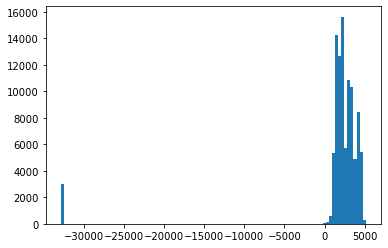

In [69]:
# Visualization of sea level plot counts (histogram)
# Quite a few negative values of sea level..
plt.hist(cleaned_df['sea_level'], bins = 100);

In [70]:
# We see sea level values of -32,767, which we are considering as values that
# were meant to replace null values in the original data set
cleaned_df[cleaned_df['sea_level'] < 0]

,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,NAME,...,WT19,WT21,WT22,WV01,WV03,WV07,WV18,WV20,year_month_day,sea_level
5,1980.000000,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,-32767.0
11,1980.002732,341.65,0.21,21.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800102,-32767.0
17,1980.005464,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800103,-32767.0
23,1980.008197,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800104,-32767.0
29,1980.010929,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800105,-32767.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101683,2020.724044,-999.99,-99.99,0.0,71.323,-156.611,27.46,11.0,16.46,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20200922,-32767.0
101690,2020.726776,406.58,0.12,15.0,71.323,-156.611,27.46,11.0,16.46,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20200923,-32767.0
101819,2020.775956,410.30,0.25,22.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20201011,-32767.0
101826,2020.778689,410.59,0.07,11.0,71.323,-156.611,27.46,11.0,16.46,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20201012,-32767.0


In [71]:
# Checking shape of cleaned data frame
cleaned_df.shape

(102387, 67)

In [1]:
# We have 102387 rows in total. From cell 68, we see 4658 null sea level rows.
# Likewise, negative sea level rows from cell 70 = 3058.

102387 - 3058 - 4658

94671

In [73]:
# Creating another copy
test_copy = cleaned_df.copy()

In [74]:
# Filtering out negative sea levels by masking dataframe
test_copy = test_copy[test_copy['sea_level'] > 0]

In [75]:
# Filtering out null sea level values by masking dataframe
import numpy as np
test_copy = test_copy[test_copy['sea_level'] != np.nan]

In [76]:
# Shape is consistent with what I calculated above (off by 1 due to indexing)
test_copy.shape

(94670, 67)

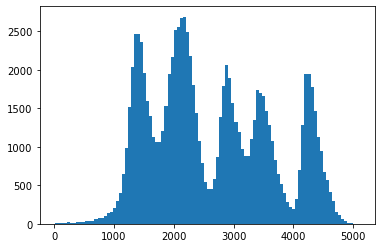

In [77]:
# Histogram of sea level
plt.hist(test_copy['sea_level'], bins = 100);

In [78]:
# Description of sea level
test_copy.groupby('NAME')['sea_level'].describe().T

NAME,0,1,2,3,4,5,6
count,13422.000000,13855.000000,14148.000000,8807.000000,14703.000000,14932.000000,14803.00000
mean,1433.170988,4332.916059,2109.363161,1401.588850,3526.897776,2959.920506,2180.06627
std,158.283848,163.102546,180.366775,338.936339,192.140195,167.876912,246.05280
min,936.000000,3872.000000,1480.000000,11.000000,2851.000000,2496.000000,1393.00000
25%,1323.000000,4215.000000,1981.000000,1229.000000,3393.000000,2841.000000,2007.00000
50%,1418.000000,4306.000000,2102.000000,1424.000000,3506.000000,2937.000000,2185.00000
75%,1532.000000,4429.000000,2229.000000,1591.000000,3646.000000,3064.000000,2345.00000
max,2019.000000,5100.000000,2865.000000,3098.000000,4265.000000,3660.000000,3048.00000


In [79]:
# Saving clean dataframe to CSV
test_copy.to_csv('./Clean_dataframe/clean_df.csv')

In [80]:
# Reading in saved dataframe from CSV and renaming as Final
Final_df = pd.read_csv('./Clean_dataframe/clean_df.csv')

In [81]:
# Reading in first 5 rows
Final_df.head()

,Unnamed: 0,time_decimal,value,value_std_dev,nvalue,latitude,longitude,altitude,elevation,intake_height,...,WT19,WT21,WT22,WV01,WV03,WV07,WV18,WV20,year_month_day,sea_level
0,0,1980.000000,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,3207.0
1,2,1980.000000,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,3567.0
2,3,1980.000000,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,2554.0
3,4,1980.000000,341.38,0.08,2.0,71.323,-156.611,27.46,11.0,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,4558.0
4,6,1980.002732,341.65,0.21,21.0,71.323,-156.611,27.46,11.0,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800102,3246.0


In [82]:
# Reading in columns
Final_df.columns

Index(['Unnamed: 0', 'time_decimal', 'value', 'value_std_dev', 'nvalue',
       'latitude', 'longitude', 'altitude', 'elevation', 'intake_height',
       'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'ACMH', 'ACSH', 'AWND',
       'DAPR', 'DASF', 'FMTM', 'MDPR', 'MDSF', 'PGTM', 'PRCP', 'PSUN', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF1', 'WDF2', 'WDF5',
       'WDFG', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13',
       'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22', 'WV01',
       'WV03', 'WV07', 'WV18', 'WV20', 'year_month_day', 'sea_level'],
      dtype='object')

In [83]:
# We see redundant columns.
# e.g. ELEVATION vs elevation.

# Will assess and remove
Final_df['elevation'].nunique()  #dropping it

1

In [84]:
# We see redundant columns.
# e.g. ELEVATION vs elevation.

# Will assess and remove
Final_df['latitude'].nunique()     #dropping it

1

In [85]:
# We see redundant columns.
# e.g. ELEVATION vs elevation.

# Will assess and remove
Final_df['longitude'].nunique()     #dropping it

1

In [86]:
# We see redundant columns.
# e.g. ELEVATION vs elevation.

# Will assess and remove
Final_df['altitude'].nunique()     #dropping it

1

In [87]:
# We see redundant columns.
# e.g. ELEVATION vs elevation.

# Will assess and remove
Final_df['intake_height'].nunique()     #dropping it

1

In [88]:
# Dropping these columns from above
Final_df.drop(columns=['Unnamed: 0','latitude','longitude','intake_height','altitude','elevation'],axis=1,inplace=True)

In [89]:
# Confirming columns dropped
Final_df.head(3)

,time_decimal,value,value_std_dev,nvalue,NAME,LATITUDE,LONGITUDE,ELEVATION,ACMH,ACSH,...,WT19,WT21,WT22,WV01,WV03,WV07,WV18,WV20,year_month_day,sea_level
0,1980.0,341.38,0.08,2.0,5,57.04810,-135.36470,4.3,80.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,3207.0
1,1980.0,341.38,0.08,2.0,4,60.12833,-149.41667,6.7,80.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,3567.0
2,1980.0,341.38,0.08,2.0,6,59.51200,-139.67120,10.1,90.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19800101,2554.0


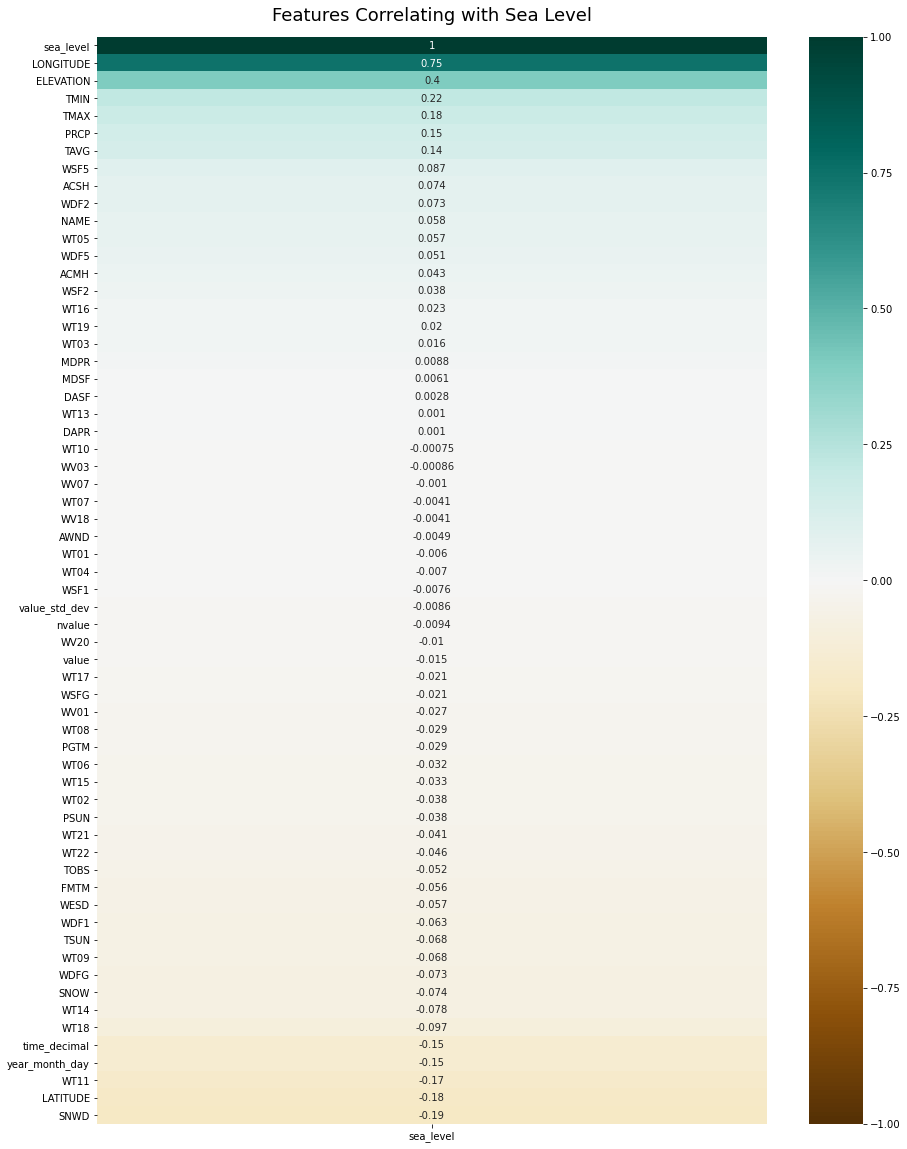

In [90]:
#Took help from https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

# Creating a heatmap to determine most correlated variables to use as predictors
plt.figure(figsize=(15, 20))
heatmap = sns.heatmap(Final_df.corr()[['sea_level']].sort_values(by='sea_level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sea Level', fontdict={'fontsize':18}, pad=16);

#### Plots of positive correlated features with the sea level

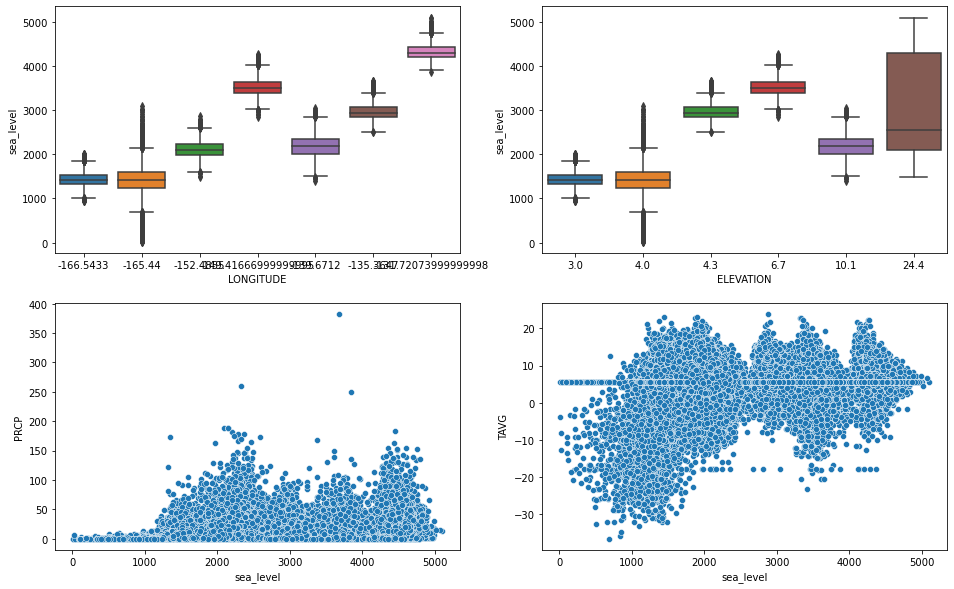

In [91]:
# Plotting boxplots of positively correlated features with the sea level
# for longitude and latitude (as they are categorical variables essentially -
# as they are weather station specific)
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x="LONGITUDE", y="sea_level", data=Final_df);
plt.subplot(2, 2, 2)
sns.boxplot(x="ELEVATION", y="sea_level", data=Final_df);

# Plotting scatterplots of sea level against precipitation and average temperature
plt.subplot(2, 2, 3)
sns.scatterplot(y="PRCP", x="sea_level", data=Final_df);
plt.subplot(2, 2, 4)
sns.scatterplot(y="TAVG", x="sea_level", data=Final_df);

In [ ]:
# We can see here that longitude and elevation (both linked to specific weather
# stations) show a difference in sea level in many stations.

# For precipitation and average temperature, the trend is not immediately clear.

#### Plots of negative correlated features with the sea level

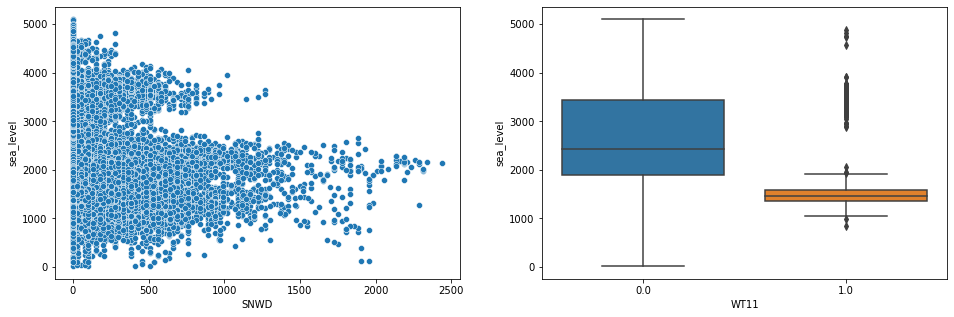

In [92]:
# Likewise, plotting the negatively correlated features against sea level

# Boxplot for sealevel vs WT11 (High or damaging winds)
# Scatterplot of sea level vs SNWD (Snow Depth)
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="SNWD", y="sea_level", data=Final_df);
plt.subplot(1, 2, 2)
sns.boxplot(x="WT11", y="sea_level", data=Final_df);

In [ ]:
# Not immediately clear either..

# Modeling:

In [93]:
# Imports for modeling
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

#### Feature Engineering:

In [94]:
# We would like to try creating some new variables based on our existing variables
# with high correlation
Final_df['LONGITUDE * ELEVATION'] = Final_df['LONGITUDE'] * Final_df['ELEVATION']   #drop this, didn't improve our model

In [95]:
Final_df['LONGITUDE * TMIN * TMAX'] = Final_df['LONGITUDE'] * Final_df['TMIN'] * Final_df['TMAX']#drop this, model not improved

In [96]:
Final_df['TMIN * TMAX'] = Final_df['TMIN'] * Final_df['TMAX']    #drop this, model didn't improve

In [97]:
Final_df['WT11 * ELEVATION'] = Final_df['WT11'] * Final_df['ELEVATION']   #drop this, didn't improve our model

In [98]:
Final_df.drop(columns=['LONGITUDE * ELEVATION','LONGITUDE * TMIN * TMAX','WT11 * ELEVATION','TMIN * TMAX'],axis=1,inplace=True)

#### Baseline Score:

In [99]:
# Using all features, we first create a simple regression model

X = Final_df.drop(columns='sea_level')
y = Final_df['sea_level']
lr_base = LinearRegression()
lr_base.fit(X,y)
print("Baseline score: ",cross_val_score(lr_base, X, y, cv=5).mean())

Baseline score:  0.7670867255184397


In [100]:
preds_lr_base=lr_base.predict(X)

In [101]:
# Root Mean Sauared Error of initial baseline model
from sklearn import metrics
print("RMSE of baseline model: ",(metrics.mean_squared_error(y, preds_lr_base))**.5)

RMSE of baseline model:  443.97424986525635


#### Linear Model:

In [102]:
# In a sense, similar to above, and is a baseline model in it's own right,
# except we are using the 6 most correlated features to sea level

features = ['LONGITUDE', 'ELEVATION','TMIN', 'TMAX' ,'PRCP','TAVG']
X = Final_df[features]
y = Final_df['sea_level']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [103]:
# Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc  = sc.transform(X_test)

In [104]:
lr = LinearRegression()

In [105]:
lr.fit(X_train_sc,y_train)

LinearRegression()

In [106]:
# Obviously, we will lose correlation score because we're decreasing our
# predictive variables significantly. 

# Train set score
lr.score(X_train_sc,y_train)

0.5807322845500642

In [107]:
# Test set score

lr.score(X_test_sc,y_test)

0.5839589834509331

In [108]:
preds_lr=lr.predict(X_test_sc)

In [109]:
# RMSE of this model
print("RMSE of linear model: ",(metrics.mean_squared_error(y_test, preds_lr))**.5)

RMSE of linear model:  655.1519185205393


#### Polynomial Features:

In [110]:
# Creating Polynomial Features to test
from sklearn.preprocessing import PolynomialFeatures
features = ['LONGITUDE', 'ELEVATION','TMIN', 'TMAX','PRCP','TAVG']
X = Final_df[features]
y = Final_df['sea_level']

In [111]:
poly = PolynomialFeatures(include_bias=False)

In [112]:
X_poly = poly.fit_transform(X)

In [113]:
pd.DataFrame(X_poly, columns=poly.get_feature_names(features)).head(5)

,LONGITUDE,ELEVATION,TMIN,TMAX,PRCP,TAVG,LONGITUDE^2,LONGITUDE ELEVATION,LONGITUDE TMIN,LONGITUDE TMAX,...,TMIN^2,TMIN TMAX,TMIN PRCP,TMIN TAVG,TMAX^2,TMAX PRCP,TMAX TAVG,PRCP^2,PRCP TAVG,TAVG^2
0,-135.36470,4.3,1.1,6.1,5.8,5.6,18323.602006,-582.068210,-148.901170,-825.724670,...,1.21,6.71,6.38,6.16,37.21,35.38,34.16,33.64,32.48,31.36
1,-149.41667,6.7,-14.4,-8.3,0.0,5.6,22325.341274,-1001.091689,2151.600048,1240.158361,...,207.36,119.52,-0.00,-80.64,68.89,-0.00,-46.48,0.00,0.00,31.36
2,-139.67120,10.1,-18.3,-1.1,5.1,5.6,19508.044109,-1410.679120,2555.982960,153.638320,...,334.89,20.13,-93.33,-102.48,1.21,-5.61,-6.16,26.01,28.56,31.36
3,-131.72074,24.4,1.7,4.4,2.5,5.6,17350.353346,-3213.986056,-223.925258,-579.571256,...,2.89,7.48,4.25,9.52,19.36,11.00,24.64,6.25,14.00,31.36
4,-135.36470,4.3,2.8,3.3,10.9,5.6,18323.602006,-582.068210,-379.021160,-446.703510,...,7.84,9.24,30.52,15.68,10.89,35.97,18.48,118.81,61.04,31.36


In [114]:
# We get a much larger correlation coefficient.
# However, with future models, we get better results so we will opt to 
# get rid of polynomial features, including the columns generated above.

cross_val_score(lr, X_poly, y, cv=5).mean()

0.9519478687000371

#### Random Forest:

In [115]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor

rf = RandomForestRegressor(n_estimators=100)
et = ExtraTreesRegressor(n_estimators=200)

In [116]:
# Training and testing correlation coefficients.
# Very good scores, and only slight overfitting. (approximately 0.026 discrepancy)
rf.fit(X_train_sc, y_train)
print("Random Forest Train Score: ",rf.score(X_train_sc, y_train))  
print("Random Forest Test Score: ",rf.score(X_test_sc, y_test))

Random Forest Train Score:  0.9899165230292412
Random Forest Test Score:  0.9638046917841293


In [117]:
preds_rf=rf.predict(X_test_sc)

In [118]:
# RMSE - Very good, compared to other models.
# We will soon see that this performed the best
print("RMSE of Random Forest model: ",(metrics.mean_squared_error(y_test, preds_rf))**.5)

RMSE of Random Forest model:  193.24135864796563


In [119]:
# We will see the ratio of importance for these 6 features
rf.feature_importances_

array([0.68814094, 0.27542655, 0.00975458, 0.01044689, 0.01021664,
       0.00601439])

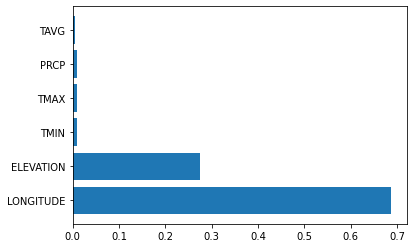

In [120]:
# The importance of the 6 features are plotted in a bar chart
plt.barh(features, rf.feature_importances_);

#### Extra Trees:

In [121]:
# Better than Random Forest in training set score but more overfit than Random Forest
et.fit(X_train_sc, y_train)
print("Extra Tree Train Score: ",et.score(X_train_sc, y_train))  
print("Extra Tree Test Score: ",et.score(X_test_sc, y_test))

Extra Tree Train Score:  0.9932009521488473
Extra Tree Test Score:  0.9602947639662035


In [122]:
preds_et=et.predict(X_test_sc)

In [123]:
# RMSE for Extra Trees is greater than for Random Forest
print("RMSE of Extra Trees model: ",(metrics.mean_squared_error(y_test, preds_et))**.5)

RMSE of Extra Trees model:  202.39409325922992


#### ADA Boosting

In [124]:
ad = AdaBoostRegressor()
ad.fit(X_train_sc,y_train)

AdaBoostRegressor()

In [125]:
# Random Forest R-squared scores are better in both training and testing sets
print("ADA Boosting Train Score: ",ad.score(X_train_sc, y_train))  
print("ADA Boosting Test Score: ",ad.score(X_test_sc, y_test))

ADA Boosting Train Score:  0.9601133171840003
ADA Boosting Test Score:  0.9599110912114687


In [126]:
preds_ad=ad.predict(X_test_sc)

In [127]:
# Likewise, Random Forest has better RMSE score
print("RMSE of Random Forest model: ",(metrics.mean_squared_error(y_test, preds_ad))**.5)

RMSE of Random Forest model:  203.36961206934166


#### Saving Pickle for best Model (Random Forest) to use in Streamlit App.

In [128]:
import pickle
pickle.dump(rf,open('Random_Forest_model.pkl','wb'))

#### Comparison of Streamlit App Output to Random Forest Predictions in Jupyter Lab

In [129]:
# Example
rf.predict(np.reshape([-139.6712, 3.0, 20, 25, 100, 2],(1,-1)))

array([1796.46])